# Python Beginner Workshop 2

### 2.1 Quick overview of modules in Python
> Modules are groups of classes and functions. When we import a module, we can use these classes and functions in our code. The following snippets show how to import and use functions and classes inside a module.
> For instance, the *numpy* module offers powerful N-dimensional array object, linear algebra operations and Fourier transforms.

In [3]:
import time # time is a module

time.asctime() # we call the function asctime from the time module
    # by writing the module following by a point before the 
    # function we want to use. 

'Sun Aug  2 19:17:26 2020'

In [4]:
import numpy as np # we can rename the module with the "as" keyword.
    # Then, we refer to numpy as np in our code
    
np.linspace(0.1, 10) # same case as in our previous cell, except that
    # now we wrote np instead of numpy before the dot and our function.

array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ])

In [5]:
from numpy import array # we can also directly import one or few functions
    # or classes from a module using the import keyworkd.
    

array([1,2,3,4]) # because we directly imported the array class from the 
    # numpy module using the import keyword, we don't have to write 
    # the module name followed by a dot.


array([1, 2, 3, 4])

### 2.2 Opening folders and understanding where you files are on your disk in Python.
> The $os$ module allows you to access your filesystem and to intereact with files on your disk. The $os$ module works independently of your operating system. Using this module, we can open files stored in different folders.

In [6]:
import os
os.getcwd() # shows the current working directory

'/home/jackson/PycharmProjects/python-tutorials/pandas'

In [7]:
os.listdir() # shows the files in your current directory

['solutionnaire2.ipynb',
 '.ipynb_checkpoints',
 'bitcoin_history.csv',
 'beginner_workshop2.ipynb',
 'tutoriel_débutant2.ipynb',
 'answers_2.ipynb',
 'starWarsClean.csv']

> A usual situation is having to open a file in a specific folder. In our case, we want to open the file "starWarsClean.csv" which you can download [here](https://drive.google.com/file/d/1XNGKtLzBacQaaP7PgPgyfBHc3Ux1nl2w/view?usp=sharing). I assume that your file is in your download folder after you've downloaded it. This folder is probably somwhere like this,  
![path](https://i.ibb.co/kS9XkKR/image.png)  
Note that Windows use backslashes (\). On the other hand, Linux and Mac uses forward slashes (/). So we would write our path like this:

In [12]:
PATH = "C:\\Users\\mystery\\Downloads" # on windows, we have to double backslashes
PATH = "/home/jackson/PycharmProjects/python-tutorials/pandas/" # on linux/mac, slashes
filename = "bitcoin_history.csv"

os.path.join(PATH, filename) # os path join deals automatically with slashes

'/home/jackson/PycharmProjects/python-tutorials/pandas/bitcoin_history.csv'

> Now that we have access to files anywhere on our computer, we will open the star wars dataset.

### 2.3 Pandas DataFrame
> The pandas module offers a tremendous amount of functionalities for python developers dealing with datasets. DataFrames are important components of the pandas module which represent a data type with rows and columns. Rows are internally represented as index. Both rows and columns have names. We can directly open a csv using the pandas module such that it is mapped to a DataFrame.

In [1]:
!pip install expects

In [48]:
from expects import expect, equal, contain_exactly
import pandas as pd

# open the file "bitcoin_history.csv"
#bitcoin_data = pd.read_csv(os.path.join(PATH, filename))
# let's be lazy
bitcoin_data = pd.read_csv("https://raw.githubusercontent.com/erikmagic/python-tutorials/master/pandas/bitcoin_history.csv")
'''
import io
from google.colab import files
uploaded = files.upload()
star_wars_data = pd.read_csv(io.StringIO(uploaded['bitcoin_history.csv'].decode()))
'''

bitcoin_data.head() # head() returns the 5 first rows by default

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,118.9","11,802.6","12,061.1","10,730.7",647.23K,-5.80%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


#### 2.3.1 The different ways of retrieving data from a DataFrame
> In the previous cell, we used the head() function which automatically returns the 5 first rows of our DataFrame. However, we might want to access other rows or elements of our DataFrame. The two main ways of doing so are the function *loc* and *iloc*. These functions use the _slicing_ and _indexing_ capabilities that we looked at previously.  
> The *iloc* function is used to access our data with indices (numerical inputs) while the *loc* function is used to access our dataset with the name of our rows and columns.

In [14]:
# iloc use numerical inputs
bitcoin_data.iloc[0] # returns the first row

Date        Aug 02, 2020
Price           11,118.9
Open            11,802.6
High            12,061.1
Low             10,730.7
Vol.             647.23K
Change %          -5.80%
Name: 0, dtype: object

In [15]:
# iloc can return multiple rows at once if you give it a list as input
bitcoin_data.iloc[[0,2,3]] # returns the first, third and fourth rows

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,118.9","11,802.6","12,061.1","10,730.7",647.23K,-5.80%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%


In [16]:
# we can slice a DataFrame using iloc
bitcoin_data.iloc[:5] # returns the first 5 rows just like the head function

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,118.9","11,802.6","12,061.1","10,730.7",647.23K,-5.80%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [17]:
# iloc can be used to return a subset of columns (here we specify we want the 2 first columns - after the comma)
bitcoin_data.iloc[:5, :2] # returns the 2 first columns of the first 5 rows

,Date,Price
0,"Aug 02, 2020","11,118.9"
1,"Aug 01, 2020","11,803.1"
2,"Jul 31, 2020","11,333.4"
3,"Jul 30, 2020","11,096.2"
4,"Jul 29, 2020","11,105.9"


In the previous example
```
bitcoin_data.iloc[:5, :2]
```
Notice the comma, it splits the rows from the columns. The following line
```
bitcoin_data.iloc[:, :]
```
returns all data in our DataFrame (the complete DataFrame). While the following line
```
bitcoin_data.iloc[0:1, 0:1]
```
returns only a DataFrame consisting of the very first element. (first row and fist column)


In [18]:
bitcoin_data.iloc[0:1, 0:1]

,Date
0,"Aug 02, 2020"


In [19]:
type(bitcoin_data.iloc[0:1, 0:1]) # in fact this is a DataFrame, and now a number

pandas.core.frame.DataFrame

In [20]:
# using lists as input
bitcoin_data.iloc[[0,1,3], [4, 5]]

,Low,Vol.
0,"10,730.7",647.23K
1,"11,226.1",611.47K
3,"10,861.6",501.14K


> *loc* works with text data. We use the columns and rows name to access the DataFram when using the *loc* function.

In [21]:
bitcoin_data.loc[[0, 1, 2]] # in fact, our rows' name are number so same as iloc in this specific instance

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,118.9","11,802.6","12,061.1","10,730.7",647.23K,-5.80%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%


In [22]:
bitcoin_data.loc[:5, ['Date', 'Vol.']] # 5 first rows and only 2 columns

,Date,Vol.
0,"Aug 02, 2020",647.23K
1,"Aug 01, 2020",611.47K
2,"Jul 31, 2020",530.95K
3,"Jul 30, 2020",501.14K
4,"Jul 29, 2020",576.83K
5,"Jul 28, 2020",658.37K


#### Exercise 1
> Display the *Open* of the third day in our DataFrame using the _loc_ function.

In [40]:
x = None # assign the proper value to this variable

expect(x).to(equal('11,096.5'))

AssertionError: 
expected: None to equal '11,096.5'

#### Exercise 2
> Display the *Change %*  of all the days in our DataFrame using the _loc_ function.

In [54]:
x = None
expect(list(x)).to((contain_exactly(*list(pd.read_csv("https://raw.githubusercontent.com/erikmagic/python-tutorials/master/pandas/bitcoin_history.csv")["Change %"]))))

TypeError: 'NoneType' object is not iterable

### 2.4 Visualisation with the pandas DataFrame
> Pandas DataFrame allows us to directly plot datasets in different ways. We can use the _plot_ function directly on a DataFrame. However, to plot, we need to import the *matplotlib* module. *matplotlib* is frequently use for visualisation purposes and can also be used on other data types than pandas DataFrame such as lists or numpy arrays.

In [85]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
plt.close('all')

In [101]:
# small detour to bin the data
bitcoin_data['numerical_change'] = bitcoin_data['Change %'].str.extract("([-+]?\d+.\d+)")[0].astype("float")
bitcoin_data['yield'] = pd.cut( bitcoin_data.numerical_change
                               , 3
                               , labels=['low yield', 'medium yield', 'high yield'])

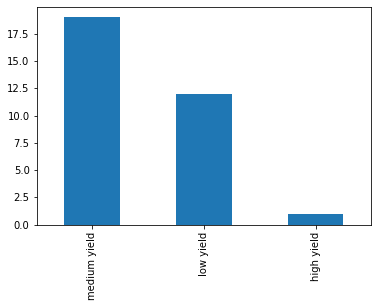

In [102]:
bitcoin_data['yield'].value_counts().plot(kind='bar')

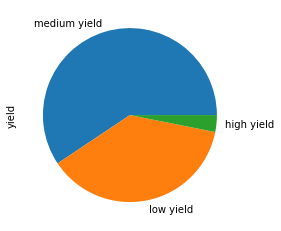

In [67]:
bitcoin_data['yield'].value_counts().plot(kind='pie')

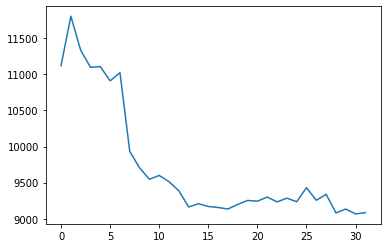

In [73]:
# notice how wrong this is!!

bitcoin_data['numerical_price'] = bitcoin_data.Price.str.replace(",", "").astype("float")
bitcoin_data.numerical_price.plot()

### 2.4 More possibilities with matplotlib.pyplot
> We have seen how to display simple plots directly from a DataFrame. However, while efficient, this method is very limited. We have a lot more options when using *matplotlib* _subplots_ and figures directly. *matplotlib*'s advantages per Wikipedia are the following:
* You can export in many formats (PNG, JPEG, PDF, SVG ...)
* There is a lot of easily accessible documentation on the web
* The community is very active
* Pylab can reproduce the MATLAB syntax
* high level module which is ideal for interactive computations  

> There exists other visualisations packages in Python sush as *plotly* and *seaborn*.  
Now, we can modify our figures by adding labels, titles, a legend and modify the size of our plots

/home/jackson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


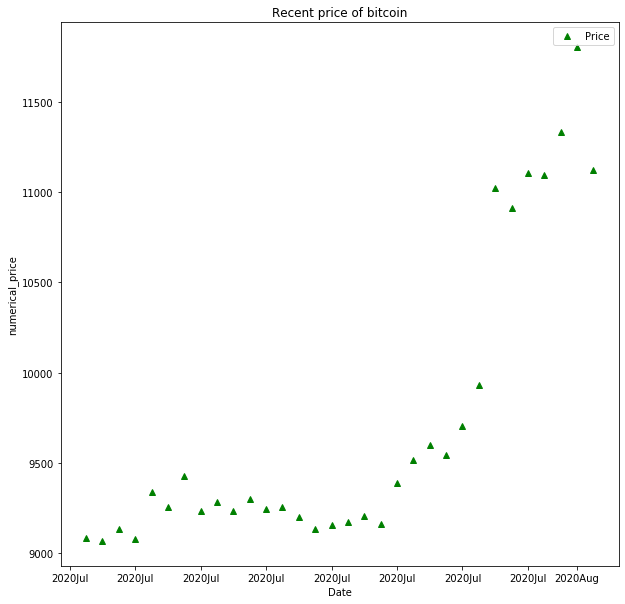

In [96]:
bitcoin_dat = bitcoin_data[['Date', 'numerical_price']]
bitcoin_dat['Date'] = pd.to_datetime(bitcoin_dat.Date, format="%b %d, %Y")
bitcoin_dat.set_index("Date", inplace=True)

fig, ax = plt.subplots(figsize=(10,10)) # modify the size of our plot
                # default size is 6.4 * 6.4 inches
plt.plot(bitcoin_dat, 'g^')
plt.xlabel('Date')
plt.ylabel('numerical_price')
plt.legend(['Price'])
plt.title('Recent price of bitcoin')

date_fmt = mdates.DateFormatter("%Y%b")
ax.xaxis.set_major_formatter(date_fmt)

In [2]:
bitcoin_chg = bitcoin_data[['Date', 'numerical_change']]
bitcoin_chg['Date'] = pd.to_datetime(bitcoin_chg.Date, format="%b %d, %Y")
bitcoin_chg.set_index("Date", inplace=True)


figure, axes = plt.subplots(2, 1, figsize=(10,10)) # 2 * 1 images with this specified size.
# the title of our plots
figure.suptitle('Plot Title')

# axes represent a subgraph in our figure 
ax1 = axes[0]
ax2 = axes[1]

# the data from the first DataFrame will be in green
ax1.plot(bitcoin_dat, 'g^')

# the data from our second DataFrame will be in red
ax2.plot(bitcoin_chg, 'r-')


# subgraphs' titles
ax1.set_title('First Plot')
ax2.set_title('Second Plot')

# setting the x labels
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')

ax1.set_ylabel('Value')
ax2.set_ylabel('Value')

# let's display some legends
ax1.legend(['Bitcoin price'])
ax2.legend(['Bitcoin change'])



NameError: name 'bitcoin_data' is not defined

### Descriptive statistics using pandas Dataframe
> We can directly generate a description of our dataset when our dataset is in the DataFrame format. By default, a description will only target numerical data types. 

In [104]:
bitcoin_data.describe()

,numerical_price,numerical_change
count,32.000000,32.000000
mean,9720.225000,0.614375
std,826.585179,2.592192
min,9067.100000,-5.800000
25%,9191.575000,-0.582500
50%,9292.950000,0.190000
75%,9761.200000,1.690000
max,11803.100000,10.980000


In [105]:
# we can also describe other data types with the include list having the 'object' value
include = ['object', 'float', 'int']
bitcoin_data.describe(include=include)

,Date,Price,Open,High,Low,Vol.,Change %,numerical_price,numerical_change
count,32,32,32,32,32,32,32,32.000000,32.000000
unique,32,32,32,32,32,32,32,NaN,NaN
top,"Jul 11, 2020","9,198.7","9,243.1","9,224.2","9,049.6",314.10K,-0.58%,NaN,NaN
freq,1,1,1,1,1,1,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9720.225000,0.614375
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,826.585179,2.592192
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9067.100000,-5.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9191.575000,-0.582500
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9292.950000,0.190000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9761.200000,1.690000


In [107]:
import numpy as np
# 1000 data points
x = np.random.randn(1000)
y = pd.date_range('1/1/2019', periods=1000)
df = pd.DataFrame(data=x, index=y)
# we can change the name of the columns
df.columns = ['Valeur']
df.head()

,Valeur
2019-01-01,-0.613766
2019-01-02,1.730191
2019-01-03,-1.317593
2019-01-04,-1.395231
2019-01-05,0.192300


#### Exercise 3
> Reproduce the following figure:  
![pomm](https://i.ibb.co/0rYWbhq/image.png)  
Such that the figure's sizeis 9 by 9 inches, the data points are represented as circles, their color is yellow and we see the same information (axes, legend ...) describing the figure. Take the *df* dataset. Evidently, your figure will look different as our dataset is randomly generated each time.